# Proyecto: Métodos de minería de datos en Python
  
por: 
* María Paula Vargas R
* Jeisson F Castañeda G
  
16 de septiembre de 2021
# Introducción.  
Los materiales superconductores son aquellos que, bajo ciertas condiciones, tienen la capacidad de conducir corriente eléctrica sin ninguna resistencia ni pérdida de energía  

# Base de datos.

La base de datos extraída de UC Irvine Machine Learning Repository contiene la información de 21263 superconductores y sus 81 características más relevantes que se tomaron en la University of Pennsylvania.
  
# Objetivo

El objetivo de la base es predecir la temperatura crítica en función de las características relevantes.
  



# Carga los datos

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#4/1AX4XfWhtheqLmtZsK6b4ZW40zHVFm4C4nI0O6AzX0u59evXoMKpywfOMaCg

In [ ]:
#https://drive.google.com/file/d/18G55Oybe-ikum5JRBiDeDyReJ7tGR8s3/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'18G55Oybe-ikum5JRBiDeDyReJ7tGR8s3'})
fileDownloaded.GetContentFile('Datos.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
from sklearn import metrics
!pip install -U -q PyDrive

In [ ]:
df1 = pd.read_csv('Datos.csv')
df1.head()

number_of_elements  mean_atomic_mass  ...  wtd_std_Valence  critical_temp
0                   4         88.944468  ...         0.437059           29.0
1                   5         92.729214  ...         0.468606           26.0
2                   4         88.944468  ...         0.444697           19.0
3                   4         88.944468  ...         0.440952           22.0
4                   4         88.944468  ...         0.428809           23.0

[5 rows x 82 columns]

# Descriptivos

In [ ]:
# Preprocesamiento de datos #
#Tipo de datos
df1.dtypes

number_of_elements         int64
mean_atomic_mass         float64
wtd_mean_atomic_mass     float64
gmean_atomic_mass        float64
wtd_gmean_atomic_mass    float64
                          ...   
range_Valence              int64
wtd_range_Valence        float64
std_Valence              float64
wtd_std_Valence          float64
critical_temp            float64
Length: 82, dtype: object

In [ ]:
#Datos faltantes
for col in df1.columns:
    num_missing = df1[col].isnull().sum()
    pct_missing = np.mean(df1[col].isnull())
    #print(col," - ",round(pct_missing*100, 2),"% - ",num_missing)
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

number_of_elements - 0.0% - 0
mean_atomic_mass - 0.0% - 0
wtd_mean_atomic_mass - 0.0% - 0
gmean_atomic_mass - 0.0% - 0
wtd_gmean_atomic_mass - 0.0% - 0
entropy_atomic_mass - 0.0% - 0
wtd_entropy_atomic_mass - 0.0% - 0
range_atomic_mass - 0.0% - 0
wtd_range_atomic_mass - 0.0% - 0
std_atomic_mass - 0.0% - 0
wtd_std_atomic_mass - 0.0% - 0
mean_fie - 0.0% - 0
wtd_mean_fie - 0.0% - 0
gmean_fie - 0.0% - 0
wtd_gmean_fie - 0.0% - 0
entropy_fie - 0.0% - 0
wtd_entropy_fie - 0.0% - 0
range_fie - 0.0% - 0
wtd_range_fie - 0.0% - 0
std_fie - 0.0% - 0
wtd_std_fie - 0.0% - 0
mean_atomic_radius - 0.0% - 0
wtd_mean_atomic_radius - 0.0% - 0
gmean_atomic_radius - 0.0% - 0
wtd_gmean_atomic_radius - 0.0% - 0
entropy_atomic_radius - 0.0% - 0
wtd_entropy_atomic_radius - 0.0% - 0
range_atomic_radius - 0.0% - 0
wtd_range_atomic_radius - 0.0% - 0
std_atomic_radius - 0.0% - 0
wtd_std_atomic_radius - 0.0% - 0
mean_Density - 0.0% - 0
wtd_mean_Density - 0.0% - 0
gmean_Density - 0.0% - 0
wtd_gmean_Density - 0.0% - 0


In [ ]:
# descripción
df1['critical_temp'].describe()

count    21263.000000
mean        34.421219
std         34.254362
min          0.000210
25%          5.365000
50%         20.000000
75%         63.000000
max        185.000000
Name: critical_temp, dtype: float64

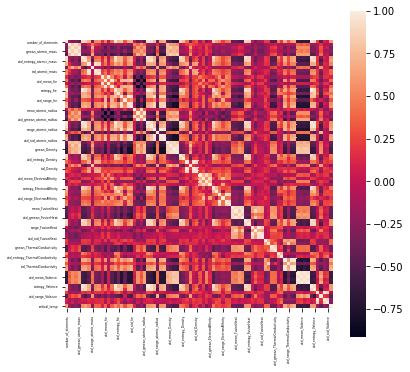

In [ ]:
#Obsevar correlación
corr_matrix = df1.corr()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.heatmap(
    corr_matrix,
    square    = True,
    ax        = ax
)
ax.tick_params(labelsize = 3)

In [ ]:
#eliminar variables con correlación baja < 0,1 con la variable respuesta
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper = abs(corr_matrix )
upper = upper[81:]
to_drop = [column for column in upper.columns if any(upper[column] < 0.1)]
to_drop 

['gmean_fie', 'entropy_ThermalConductivity']

In [ ]:
X = df1.drop(['critical_temp','gmean_fie', 'entropy_ThermalConductivity'], axis=1)
y = df1.critical_temp

In [ ]:
#eliminar variables con alta correlación entre ellas >0,9
corr_matrix = X.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper = abs(upper)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
to_drop 

['gmean_atomic_mass',
 'wtd_gmean_atomic_mass',
 'entropy_atomic_mass',
 'std_atomic_mass',
 'wtd_std_atomic_mass',
 'wtd_gmean_fie',
 'entropy_fie',
 'std_fie',
 'wtd_std_fie',
 'gmean_atomic_radius',
 'wtd_gmean_atomic_radius',
 'entropy_atomic_radius',
 'wtd_entropy_atomic_radius',
 'range_atomic_radius',
 'std_atomic_radius',
 'wtd_std_atomic_radius',
 'wtd_gmean_Density',
 'entropy_Density',
 'std_Density',
 'wtd_std_Density',
 'entropy_ElectronAffinity',
 'std_ElectronAffinity',
 'wtd_mean_FusionHeat',
 'gmean_FusionHeat',
 'wtd_gmean_FusionHeat',
 'entropy_FusionHeat',
 'wtd_entropy_FusionHeat',
 'std_FusionHeat',
 'wtd_std_FusionHeat',
 'std_ThermalConductivity',
 'wtd_std_ThermalConductivity',
 'wtd_mean_Valence',
 'gmean_Valence',
 'wtd_gmean_Valence',
 'entropy_Valence',
 'wtd_entropy_Valence',
 'std_Valence']

In [ ]:
X = X.drop(['gmean_atomic_mass',
 'wtd_gmean_atomic_mass',
 'entropy_atomic_mass',
 'std_atomic_mass',
 'wtd_std_atomic_mass',
 'wtd_gmean_fie',
 'entropy_fie',
 'std_fie',
 'wtd_std_fie',
 'gmean_atomic_radius',
 'wtd_gmean_atomic_radius',
 'entropy_atomic_radius',
 'wtd_entropy_atomic_radius',
 'range_atomic_radius',
 'std_atomic_radius',
 'wtd_std_atomic_radius',
 'wtd_gmean_Density',
 'entropy_Density',
 'std_Density',
 'wtd_std_Density',
 'entropy_ElectronAffinity',
 'std_ElectronAffinity',
 'wtd_mean_FusionHeat',
 'gmean_FusionHeat',
 'wtd_gmean_FusionHeat',
 'entropy_FusionHeat',
 'wtd_entropy_FusionHeat',
 'std_FusionHeat',
 'wtd_std_FusionHeat',
 'std_ThermalConductivity',
 'wtd_std_ThermalConductivity',
 'wtd_mean_Valence',
 'gmean_Valence',
 'wtd_gmean_Valence',
 'entropy_Valence',
 'wtd_entropy_Valence',
 'std_Valence'], axis=1)

In [ ]:
#variables restantes
len(X.columns)

42

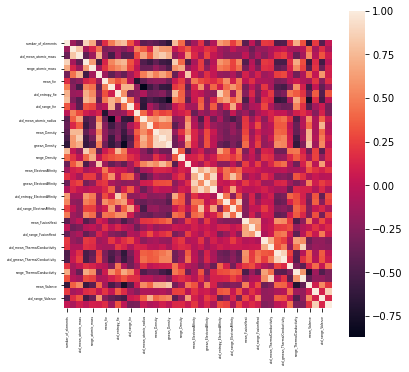

In [ ]:
corr_matrix = X.corr()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.heatmap(
    corr_matrix,
    square    = True,
    ax        = ax
)
ax.tick_params(labelsize = 3)

In [ ]:
X.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'mean_fie', 'wtd_mean_fie', 'wtd_entropy_fie', 'range_fie',
       'wtd_range_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius',
       'wtd_range_atomic_radius', 'mean_Density', 'wtd_mean_Density',
       'gmean_Density', 'wtd_entropy_Density', 'range_Density',
       'wtd_range_Density', 'mean_ElectronAffinity',
       'wtd_mean_ElectronAffinity', 'gmean_ElectronAffinity',
       'wtd_gmean_ElectronAffinity', 'wtd_entropy_ElectronAffinity',
       'range_ElectronAffinity', 'wtd_range_ElectronAffinity',
       'wtd_std_ElectronAffinity', 'mean_FusionHeat', 'range_FusionHeat',
       'wtd_range_FusionHeat', 'mean_ThermalConductivity',
       'wtd_mean_ThermalConductivity', 'gmean_ThermalConductivity',
       'wtd_gmean_ThermalConductivity', 'wtd_entropy_ThermalConductivity',
       'range_ThermalConductivity', 'wtd_range_Ther

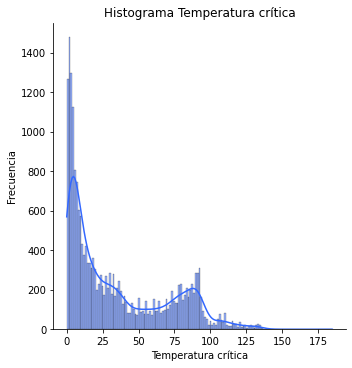

In [ ]:
y=df1['critical_temp']
n_data = len(df1)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
sns.displot(y, color='#3368FF', bins=n_bins, kde=True)
plt.ylabel('Frecuencia')
plt.xlabel('Temperatura crítica')
plt.title('Histograma Temperatura crítica')
plt.show()

In [ ]:
X = df1.drop('critical_temp', axis = 1)
y = df1.critical_temp

# PCA

In [ ]:
from sklearn.decomposition import PCA
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=4) 
pca.fit(X) # obtener los componentes principales
X_pca=pca.transform(X) # convertimos nuestros datos con las nuevas dimensiones de PCA
 
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))

shape of X_pca (21263, 4)
[0.62400839 0.29897239 0.04915194 0.01051363]
suma: 0.9826463529513056


In [ ]:
import plotly.graph_objects as go
# Comparar RMSE
headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Componente</b>','<b>Explicación</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      ['1', '2', '3', '4'],
      [0.6240, 0.2989, 0.0491, 0.010]],
    line_color='darkslategray',
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])

fig.show()

shape of X_pca (21263, 12)
[6.24008393e-01 2.98972391e-01 4.91519379e-02 1.05136316e-02
 8.67459170e-03 5.26634655e-03 1.49426088e-03 7.84658925e-04
 4.32840152e-04 2.08964832e-04 1.49078090e-04 1.32440285e-04]
suma: 0.9913209446492427


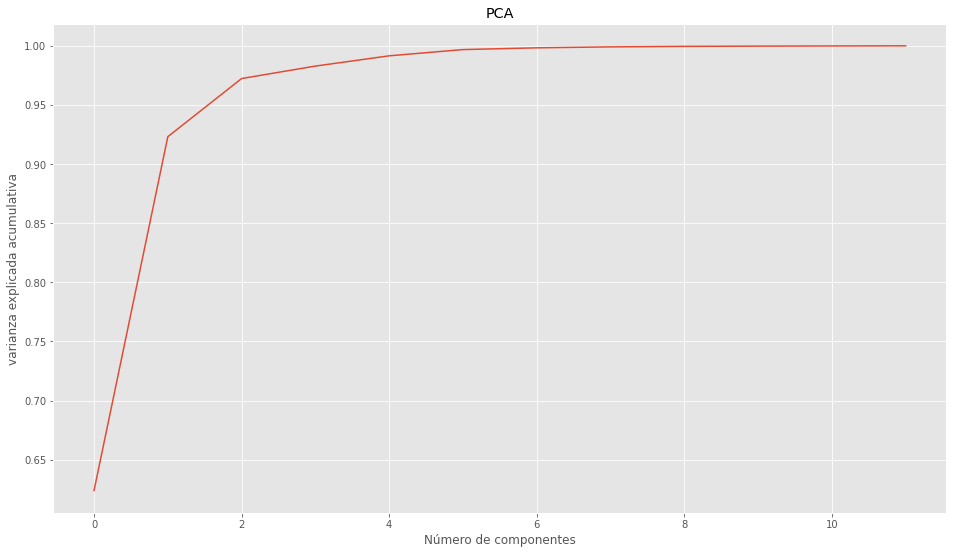

In [ ]:
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=12) 
# Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X) # obtener los componentes principales
X_pca=pca.transform(X) # convertimos nuestros datos con las nuevas dimensiones de PCA
 
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
#Vemos que con 8 componentes tenemos algo mas del 99% de varianza explicada
 

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('varianza explicada acumulativa')
plt.title("PCA")
plt.show()

In [ ]:
# Base con PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
scaler.fit(X)
X_scaled = scaler.transform(X)
###
pca_1 = PCA(n_components=4, random_state=0)
pca_1.fit(X_scaled)
X_pca_1 = pca_1.transform(X_scaled)
X_pca_1.shape

(21263, 4)

In [ ]:
X = X_pca_1
X.shape

(21263, 4)

# Validación cruzada

In [ ]:
#train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

# Modelos

In [ ]:
#LinearRegression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.r2_score(y_test, y_pred))

24.173999224111466
0.5030562118562575


Text(0.5, 1.0, 'Actual vs predicciones (LM)')

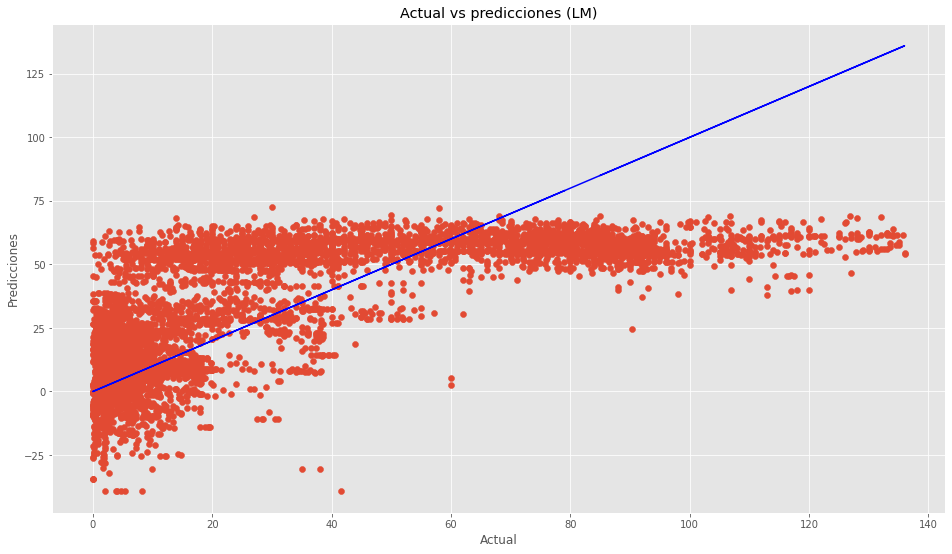

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color ='b')
plt.xlabel("Actual")
plt.ylabel("Predicciones")
plt.title("Actual vs predicciones (LM)")

In [ ]:
# Ridge.
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('Config: %s' % results.best_params_)

Config: {'alpha': 0.99}


In [ ]:
ridgereg = Ridge(alpha=0.99)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.r2_score(y_test, y_pred))

24.173999306289442
0.5030562084775998


Text(0.5, 1.0, 'Actual vs predicciones (Lasso)')

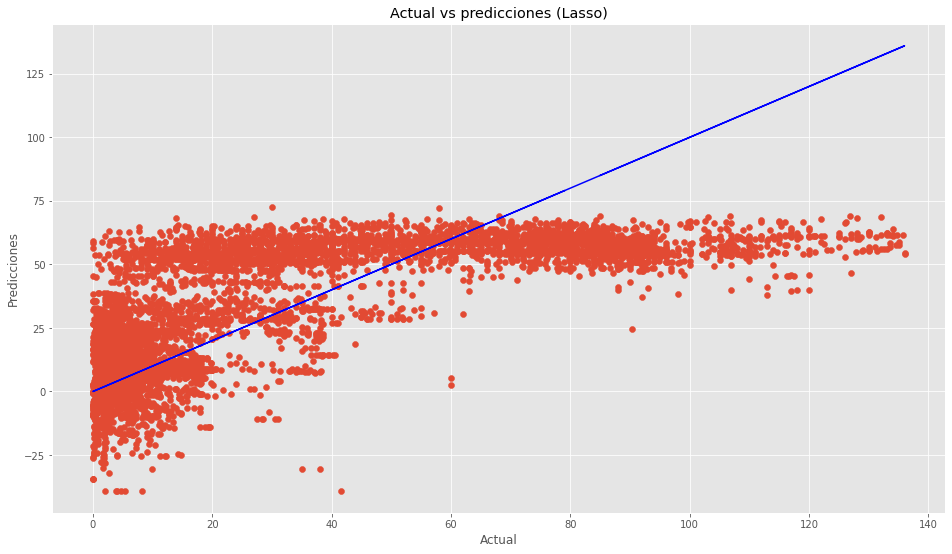

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color ='b')
plt.xlabel("Actual")
plt.ylabel("Predicciones")
plt.title("Actual vs predicciones (Lasso)")

In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)  
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

12.502388081187037


In [ ]:
from sklearn.model_selection import GridSearchCV
# variar hiperparámetros
# SE DEMORA
parameters = {
    'max_depth': [70, 80, 90, 100],
    'n_estimators': [900, 1000, 1100]
}
gridforest = GridSearchCV(regressor, parameters, cv = 3, n_jobs = -1, verbose = 1)
gridforest.fit(X_train, y_train)
gridforest.best_params_


Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'max_depth': 70, 'n_estimators': 1000}

In [ ]:
#{'max_depth': 70, 'n_estimators': 1000}
regressor = RandomForestRegressor(n_estimators = 1000, max_depth=70,  random_state = 0)
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)

In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.r2_score(y_test, y_pred))

12.502388081187037
0.8670782012722553


Text(0.5, 1.0, 'Actual vs predicciones (RandomForest)')

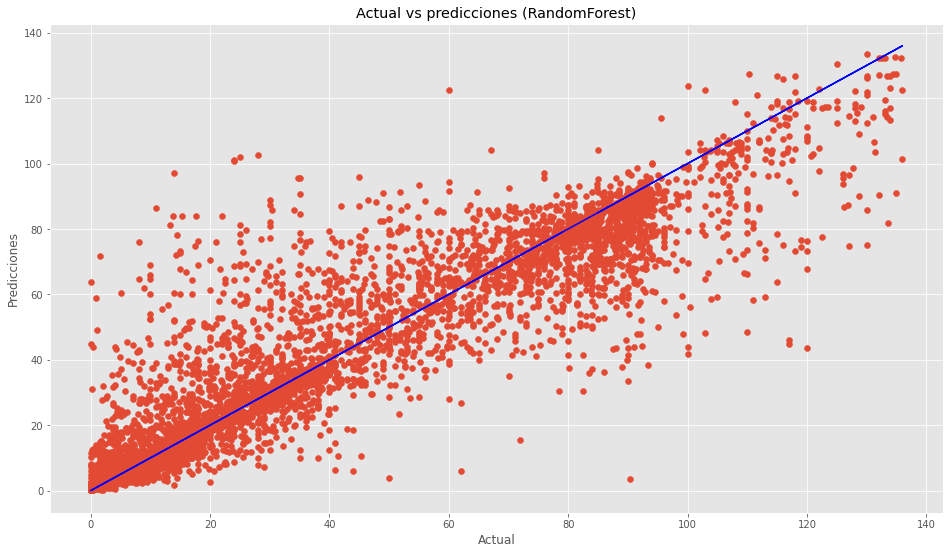

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color ='b')
plt.xlabel("Actual")
plt.ylabel("Predicciones")
plt.title("Actual vs predicciones (RandomForest)")

# Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor
params_bag_GS = {"n_estimators": [50,100,200],
              "max_features":[1,2,4,6,8],
              "max_samples": [0.5,0.1],
            "bootstrap": [True, False],
         "bootstrap_features": [True, False]}
baggingR = BaggingRegressor()
Bag_model_GS = GridSearchCV(baggingR, param_grid=params_bag_GS)
Bag_model_GS.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


240 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py", line 342, in _fit
    raise ValueError("max_features must be in (0,

GridSearchCV(estimator=BaggingRegressor(),
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [1, 2, 4, 6, 8],
                         'max_samples': [0.5, 0.1],
                         'n_estimators': [50, 100, 200]})

In [ ]:

Bag_model_GS.best_estimator_

BaggingRegressor(bootstrap=False, max_features=4, max_samples=0.5,
                 n_estimators=200)

In [ ]:

bagreg = BaggingRegressor(DecisionTreeRegressor(),bootstrap = False, bootstrap_features = False, max_features = 4, max_samples = 0.5, n_estimators = 200)

In [ ]:
bagreg.fit(X_train, y_train)
y_pred = bagreg.predict(X_test)
y_pred

array([84.387     , 72.1024    ,  9.08999681, ..., 37.76961468,
       28.20748068, 59.779     ])

In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.r2_score(y_test, y_pred))

12.494569645400551
0.8672443960174339


# Comparación de los modelos

In [ ]:
import plotly.graph_objects as go
# Comparar RMSE
headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Modelo</b>','<b>RMSE</b>', 'R2'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      ['LinearRegression', 'Ridge', 'RandomForest','Bagging'],
      [24.174, 24.174, 12.502, 12.453],
      [0.503, 0.503, 0.867, 0.868]],
    line_color='darkslategray',
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])

fig.show()